In [1]:
%matplotlib inline
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
logDir = 'models_and_stats/'
column_names = ["Property_label", "Model", "kfold", "Epoch", "tv", "Accuracy"] # tv represents train/val

In [3]:
def obtain_one_model_df(model_name, model_name_short, property_label, K=5):
    # create a new df for this model
    df=pd.DataFrame(columns=column_names)
    for kfold_number in range(K):
        stats_dict_dir = logDir + model_name + "_k4_fold{}_0.pkl".format(kfold_number)
        stats_dict = pickle.load(open(stats_dict_dir, "rb"))
    #     print(stats_dict.keys()) #dict_keys(['epoch_train_loss', 'epoch_train_acc', 'epoch_val_loss', 'epoch_val_acc', 'test_acc'])
        for epoch in range(len(stats_dict['epoch_val_acc'])):
    #         df = df.append({'model': model_name_short, "rep": i+1, "epoch": epoch+1, "tv": "t", "acc":stats_dict['epoch_train_acc'][epoch]}, ignore_index=True)
            df = df.append({"Property_label": property_label, "Model": model_name_short, "kfold": kfold_number+1, "Epoch": epoch+1, "tv": "v", "Accuracy":stats_dict['epoch_val_acc'][epoch]}, ignore_index=True)
    print("df for {} shape: {}".format(model_name, df.shape))
    return df

In [4]:
def obtain_one_model_df_rep(model_name, model_name_short, dataset, num_rep=5):
    # create a new df for this model
    df=pd.DataFrame(columns=column_names)
    for i in range(num_rep):
        stats_dict_dir = logDir + model_name + "_rep{}_fold{}_{}.pkl".format(i+1, kfold_number, i+1)
        stats_dict = pickle.load(open(stats_dict_dir, "rb"))
#         print(stats_dict.keys()) #dict_keys(['epoch_train_loss', 'epoch_train_acc', 'epoch_val_loss', 'epoch_val_acc', 'test_acc'])
        for epoch in range(len(stats_dict['epoch_train_acc'])):
    #         df = df.append({'model': model_name_short, "rep": i+1, "epoch": epoch+1, "tv": "t", "acc":stats_dict['epoch_train_acc'][epoch]}, ignore_index=True)
            df = df.append({"dataset": dataset, "model": model_name_short, "rep": i+1, "Epoch": epoch+1, "tv": "v", "Accuracy":stats_dict['epoch_val_acc'][epoch]}, ignore_index=True)
    print("df for {} shape: {}".format(model_name, df.shape))
    return df

In [5]:
# An example of your model name convention: BT19_1_ConcatPathway_stiffness1_roughness0.25_p_thre_66_rs_c20_ll40_ihs[100,200]_ohs90_rf[20,10]_res1_recGRU_midLSTMo3_ep100_lr0.001_wpr_0.2_wps_0.5_wc1_wr10.001_wr20.001_wkl0.0005_var1_rep0_k4_fold{}_0.pkl

# TODO: Modify the model names
model_name_list = ["model_name_RAEC_F", "model_name_RAEC_T", "model_name_ESTRAN_F", "model_name_ESTRAN_T"]
model_name_short_list = ["RAEC", "RAEC", "ESTRAN", "ESTRAN"]
property_label_list = ["False", "True", "False", "True"]

In [6]:
# create empty df for all models
all_df = pd.DataFrame(columns=column_names)

# for each model stats_dict, append its df
for i in range(len(model_name_list)):
    df = obtain_one_model_df(model_name_list[i], model_name_short_list[i], property_label_list[i])
    if all_df.shape[0] == 0:
        all_df = df
    else:
        all_df = all_df.append(df, ignore_index=True)
    print("all_df", all_df.shape)

df for BT19_c20_hs90_wr0.01_var0_ep100_RAEC shape: (500, 6)
all_df (500, 6)
df for BT19_c50_hs90_wr0.01_var0_ep100_RAEC shape: (500, 6)
all_df (1000, 6)
df for icub_c20icub_hs90_wr0.01_var1_ep100_RAEC shape: (500, 6)
all_df (1500, 6)


In [7]:
# pathway1 = "BT19_c20_ConcatPathway_ll40_ihs[100, 200]_ohs90_rf[20, 10]_res1.0_recGRU_midLSTMo3_ep100_lr0.0005_wc1_wr10.001_wr20.001_wkl0.0005_var1"
# pathway2 = "icub_c20icub_ConcatPathway_ll40_ihs[100, 200]_ohs90_rf[20, 10]_res1.0_recGRU_midLSTMo3_ep100_lr0.0005_wc1_wr10.001_wr20.001_wkl0.0005_var1"
# pathway3 = "BT19_c50_ConcatPathway_ll40_ihs[100, 200]_ohs90_rf[20, 10]_res1.0_recGRU_midLSTMo3_ep100_lr0.0005_wc1_wr10.001_wr20.001_wkl0.0005_var1"
# model_name_list = [pathway1, pathway2, pathway3]
# model_name_short_list = ["MTR-TRAN", "MTR-TRAN", "MTR-TRAN"]
# dataset_list = ["c20", "c20icub", "c50"]

In [8]:
# for i in range(len(model_name_list)):
#     df = obtain_one_model_df_rep(model_name_list[i], model_name_short_list[i], dataset_list[i])
#     if all_df.shape[0] == 0:
#         all_df = df
#     else:
#         all_df = all_df.append(df, ignore_index=True)
#     print("all_df", all_df.shape)

df for BT19_c20_ConcatPathway_ll40_ihs[100, 200]_ohs90_rf[20, 10]_res1.0_recGRU_midLSTMo3_ep100_lr0.0005_wc1_wr10.001_wr20.001_wkl0.0005_var1 shape: (500, 6)
all_df (2000, 6)
df for icub_c20icub_ConcatPathway_ll40_ihs[100, 200]_ohs90_rf[20, 10]_res1.0_recGRU_midLSTMo3_ep100_lr0.0005_wc1_wr10.001_wr20.001_wkl0.0005_var1 shape: (500, 6)
all_df (2500, 6)
df for BT19_c50_ConcatPathway_ll40_ihs[100, 200]_ohs90_rf[20, 10]_res1.0_recGRU_midLSTMo3_ep100_lr0.0005_wc1_wr10.001_wr20.001_wkl0.0005_var1 shape: (500, 6)
all_df (3000, 6)


In [9]:
all_df.shape

(3000, 6)

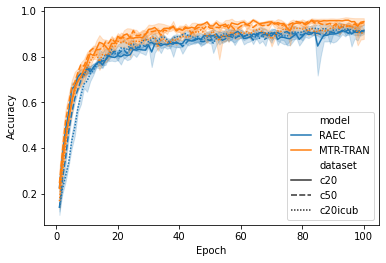

In [10]:
# example of plot multiple lines with shadow
img = sns.lineplot(data=all_df, x="Epoch", y="Accuracy", hue="Model", style="Property_label")
figname = "Compare_end_to_end_w_baseline.pdf"
plt.savefig(logDir + figname, dpi=1200)
figname = "Compare_end_to_end_w_baseline.png"
plt.savefig(logDir + figname, dpi=1200)

In [11]:
# choose two datasets only

In [12]:
# # No.1 c20/c20icub
# selected_datasets = ["c20", "c20icub"]
# c20_comp = all_df.loc[all_df['dataset'].isin(selected_datasets)]
# print(c20_comp.shape)

(2000, 6)


In [13]:
# # No. c50/c20icub
# selected_datasets = ["c50", "c20icub"]
# c50_comp = all_df.loc[all_df['dataset'].isin(selected_datasets)]
# print(c50_comp.shape)

(2000, 6)


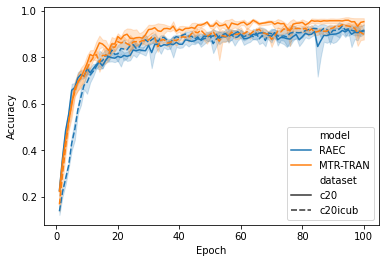

In [14]:
# # example of plot multiple lines with shadow
# img = sns.lineplot(data=c20_comp, x="Epoch", y="Accuracy", hue="model", style="dataset")
# figname = "Compare_end_to_end_w_baseline_c20.pdf"
# plt.savefig(logDir + figname, dpi=1200)
# figname = "Compare_end_to_end_w_baseline_c20.png"
# plt.savefig(logDir + figname, dpi=1200)

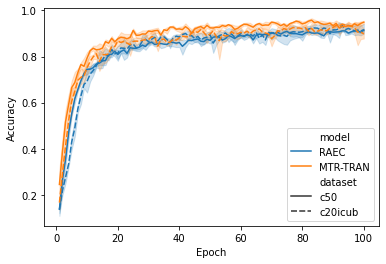

In [15]:
# # example of plot multiple lines with shadow
# img = sns.lineplot(data=c50_comp, x="Epoch", y="Accuracy", hue="model", style="dataset")
# figname = "Compare_end_to_end_w_baseline_c50.pdf"
# plt.savefig(logDir + figname, dpi=1200)
# figname = "Compare_end_to_end_w_baseline_c50.png"
# plt.savefig(logDir + figname, dpi=1200)